<h1 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:350%;text-align:center;border-radius: 15px 50px;">AirBnb-Predicting rental prices</h1>

# Table Of Content


* [1. Introduction](#1)
    * [1.1 Libraries And Utilities](#1.1)
    * [1.2 Data Loading and Data Structure](#1.2)
* [2. Exploratory Data Analysis(EDA)](#2)
    * [2.1 What about the distribution of the numeric variables](#2.1)
    * [2.2 The imbalance of binary data](#2.2)
    * [2.3 The correlation between variables](#2.3)
    * [2.4 The neighborhoods with the highest prices](#2.4)
    * [2.5 The average price by neighborhood](#2.5)
    * [2.6 Comparison between the top and the last neighborhoods in termes of price](#2.6)
    * [2.7 Neighborhoods by number of listings](#2.7)
    * [2.8 Comapring price to property type](#2.8)
    * [2.9 Comapring price to room type](#2.9)
    * [2.10 Plotting price with respect to reviews](#2.10)
* [3. Modeling](#3)
    * [3.1 Best subset selection](#3.1)
    * [3.2 Forward stepwise regression](#3.2)
    * [3.3 Backward stepwise regression](#3.3)
    * [3.4 Genetic algorithm](#3.4)
    * [3.5 Lasso Regression](#3.5)
    * [3.6 Ridge Regression](#3.6)
    * [3.7 Random Forest](#3.7)
    * [3.8 Neural Networks](#3.8)
* [4. Model Comparaison by MSE](#4)

<a id="1"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:300%;text-align:center;border-radius: 15px 50px;">Introduction</h3>

This case study is about predicting the rental price for an apartment ordered by Airbnb in London. The goal is to predict the price that may be appropriate for an apartment with certain features. This prediction can help answer various business questions. One such question is what revenue we could expect if we invested in an apartment in London and rented it via Airbnb. Another question is ?nding a good deal for one night in a speci?c neighborhood. To plan for that, we have to know what rental price we can expect to receive for various kinds of apartment at various locations of the city.

The location (borough) of the apartments will be one of their features. With a wide range of locations, our predictive model has to be able to capture potential interactions between locations and other apartment features. We need a model that is expected to
give a very good prediction, but we also need a model that can be implemented quickly. After feature engineering, we have 65 variables in total, including a set of binary variables. The data includes various types of apartments (houses, rooms, apartments). Unless it's necessary to distinguish among these, we'll call them apartments. The dataset has N = 51 646 observations. We dropped very large units (that can accommodate eight or more people), and we dropped some observations for which important variables were missing.

<a id="1.1"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")        
import matplotlib
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec

<a id="1.2"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Loading and Data Structure</h3>

In [2]:
data = pd.read_csv(r'C:\Users\moude\Desktop\Master\M2\Big data 2\final project\airbnb_london_homework.csv')

In [5]:
data.shape

(51646, 65)

So we know that this dataset has 51646 samples and 65 features. 

In [6]:
pd.value_counts(data.dtypes)

int64      58
object      5
float64     2
dtype: int64

##### Structure of non-numerical features

In [3]:
# Displaying non-numerical features
data.select_dtypes(exclude="number").head()

f_property_type   f_room_type f_cancellation_policy f_bed_type  \
0       Apartment  Private room              flexible   Real Bed   
1       Apartment  Private room              moderate      Couch   
2       Apartment  Private room              flexible   Real Bed   
3           House  Private room              flexible   Real Bed   
4           House  Private room              flexible   Real Bed   

  f_neighbourhood_cleansed  
0     Kingston upon Thames  
1     Kingston upon Thames  
2     Kingston upon Thames  
3     Kingston upon Thames  
4     Kingston upon Thames

In [4]:
data.describe(exclude="number")

f_property_type      f_room_type f_cancellation_policy f_bed_type  \
count            51646            51646                 51646      51646   
unique               2                3                     3          2   
top          Apartment  Entire home/apt                strict   Real Bed   
freq             38244            26698                 21277      50650   

       f_neighbourhood_cleansed  
count                     51646  
unique                       33  
top               Tower Hamlets  
freq                       5434

###### Structure of numerical features

In [5]:
data.describe()

usd_price_day  n_accommodates   n_bathrooms  n_review_scores_rating  \
count   51646.000000    51646.000000  51646.000000            51646.000000   
mean       94.884831        3.057178      1.260708               92.439627   
std        80.928011        1.888509      0.527094                8.438353   
min         8.000000        1.000000      0.000000               20.000000   
25%        43.000000        2.000000      1.000000               92.000000   
50%        74.000000        2.000000      1.000000               94.000000   
75%       120.000000        4.000000      1.500000               97.000000   
max       999.000000       16.000000      8.000000              100.000000   

       n_number_of_reviews  n_guests_included  n_reviews_per_month  \
count         51646.000000       51646.000000         51646.000000   
mean             12.350327           1.415773             1.138970   
std              25.860475           1.044884             1.236552   
min               0.000000           1.000000             0.010000   
25%               0.000000           1.000000             0.470000   
50%               3.000000           1.000000             0.770000   
75%              12.000000           1.000000             1.170000   
max             396.000000          16.000000            15.000000   

       n_extra_people  n_minimum_nights        n_beds  ...  d_selfcheckin  \
count    51646.000000      51646.000000  51646.000000  ...   51646.000000   
mean         6.665550          3.310266      1.708884  ...       0.041823   
std         12.691355         29.083719      1.168387  ...       0.200187   
min          0.000000          1.000000      0.000000  ...       0.000000   
25%          0.000000          1.000000      1.000000  ...       0.000000   
50%          0.000000          2.000000      1.000000  ...       0.000000   
75%         10.000000          3.000000      2.000000  ...       0.000000   
max        240.000000       5000.000000     16.000000  ...       1.000000   

          d_shampoo   d_smartlock  d_smokedetector  d_smokingallowed  \
count  51646.000000  51646.000000     51646.000000      51646.000000   
mean       0.572494      0.001859         0.776517          0.081516   
std        0.494722      0.043074         0.416583          0.273629   
min        0.000000      0.000000         0.000000          0.000000   
25%        0.000000      0.000000         1.000000          0.000000   
50%        1.000000      0.000000         1.000000          0.000000   
75%        1.000000      0.000000         1.000000          0.000000   
max        1.000000      1.000000         1.000000          1.000000   

       d_suitableforevents          d_tv      d_washer  d_washerdryer  \
count         51646.000000  51646.000000  51646.000000   51646.000000   
mean              0.027708      0.667796      0.841575       0.000794   
std               0.164136      0.471008      0.365142       0.028165   
min               0.000000      0.000000      0.000000       0.000000   
25%               0.000000      0.000000      1.000000       0.000000   
50%               0.000000      1.000000      1.000000       0.000000   
75%               0.000000      1.000000      1.000000       0.000000   
max               1.000000      1.000000      1.000000       1.000000   

       d_wheelchairaccessible  
count            51646.000000  
mean                 0.064652  
std                  0.245913  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                  1.000000  

[8 rows x 60 columns]

<a id="2"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:250%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h3>

<a id="2.1"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">What about the distribution of the numeric variables</h3>

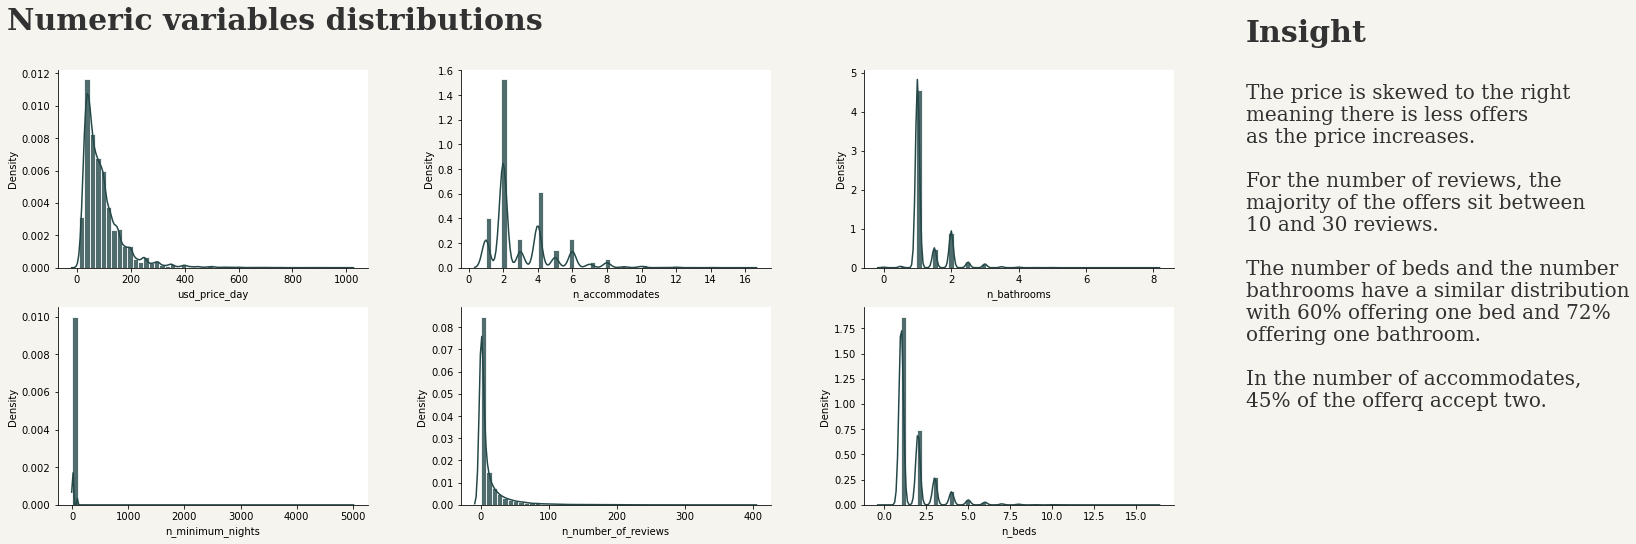

In [6]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 3)

background_color = '#F5F4EF'
fig = plt.figure(figsize=(20, 8), facecolor= background_color)


ax1 = fig.add_subplot(gs[0, 0]) 
ax1 = sns.distplot(data["usd_price_day"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

ax2 = fig.add_subplot(gs[0, 1]) 
ax2 = sns.distplot(data["n_accommodates"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

ax3 = fig.add_subplot(gs[0, 2]) 
ax3 = sns.distplot(data["n_bathrooms"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

ax4 = fig.add_subplot(gs[1, 0])
ax4 = sns.distplot(data["n_minimum_nights"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

ax5 = fig.add_subplot(gs[1, 1]) 
ax5 = sns.distplot(data["n_number_of_reviews"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

ax6 = fig.add_subplot(gs[1, 2]) 
ax6 = sns.distplot(data["n_beds"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

sns.despine()

fig.text(0.09, 0.95, 'Numeric variables distributions', fontsize=30, fontweight='bold', fontfamily='serif', color='#323232')
fig.text(0.95, 0.93, 'Insight', fontsize=30, fontweight='bold', fontfamily='serif', color='#323232')

fig.text(0.95, 0.22, '''
The price is skewed to the right
meaning there is less offers 
as the price increases. 

For the number of reviews, the 
majority of the offers sit between
10 and 30 reviews.

The number of beds and the number
bathrooms have a similar distribution
with 60% offering one bed and 72%
offering one bathroom.

In the number of accommodates, 
45% of the offerq accept two.

'''
         , fontsize=20, fontweight='light', fontfamily='serif', color='#323232')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None) 

plt.show()

<a id="2.2"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">The imbalance of binary data</h3>

In [7]:
cols1 = ['d_cats', 'd_dogs',
        'd_doorman', 'd_freeparkingonstreet',
        'd_gym','d_pool', 'd_hottub',
        'd_indoorfireplace','d_keypad', 'd_lockbox', 'd_wheelchairaccessible']
       #'d_otherpets', 'd_paidparkingoffpremises', 'd_petsallowed',
      # 'd_petsliveonthisproperty', 'd_pool', 'd_privateentrance',
      # 'd_privatelivingroom', 'd_selfcheckin',
      # 'd_smartlock','d_suitableforevents', 'd_washerdryer',
      # 'd_wheelchairaccessible']

In [8]:
df = data[cols1]

In [9]:
value_counts_df = pd.DataFrame({col: df[col].value_counts() for col in df.columns})
value_counts_df['sum'] = value_counts_df.sum(axis=1)

In [10]:
value_counts_df = pd.DataFrame({col: df[col].value_counts() for col in df.columns})

value_counts_df = value_counts_df.T
value_counts_df['sum'] = value_counts_df.sum(axis=1)

value_counts_ratio = (value_counts_df.T / value_counts_df['sum']).T

value_counts_ratio = value_counts_ratio.sort_values(by=0, ascending=False)

value_counts_ratio

0         1  sum
d_freeparkingonstreet   0.999322  0.000678  1.0
d_keypad                0.997115  0.002885  1.0
d_pool                  0.992449  0.007551  1.0
d_dogs                  0.979359  0.020641  1.0
d_gym                   0.968536  0.031464  1.0
d_lockbox               0.968168  0.031832  1.0
d_doorman               0.962011  0.037989  1.0
d_cats                  0.961546  0.038454  1.0
d_wheelchairaccessible  0.935348  0.064652  1.0
d_hottub                0.928068  0.071932  1.0
d_indoorfireplace       0.911358  0.088642  1.0

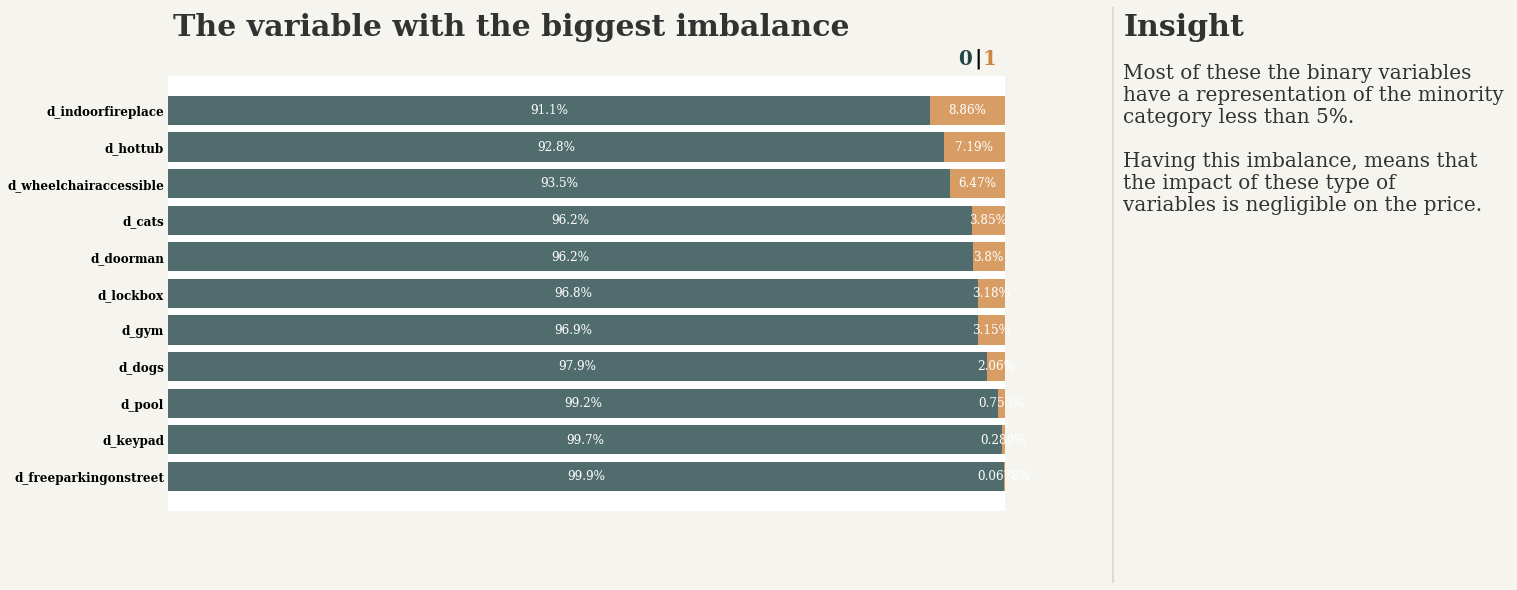

In [11]:
fig, ax = plt.subplots(1,1,figsize=(15, 8), facecolor= background_color)

ax.barh(value_counts_ratio.index, value_counts_ratio[0], 
        color='#244747', alpha=0.8, label='0')
ax.barh(value_counts_ratio.index, value_counts_ratio[1], left=value_counts_ratio[0], 
        color='peru', alpha=0.8, label='1')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(value_counts_ratio.index, fontfamily='serif', fontsize=15, fontweight='bold')

#  percentage
for i in value_counts_ratio.index:
    ax.annotate(f"{value_counts_ratio[0][i]*100:.3}%", 
                   xy=(value_counts_ratio[0][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in value_counts_ratio.index:
    ax.annotate(f"{value_counts_ratio[1][i]*100:.3}%", 
                   xy=(value_counts_ratio[0][i]+value_counts_ratio[1][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.95, 'The variable with the biggest imbalance', fontsize=30, fontweight='bold', fontfamily='serif', color='#323232')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

fig.text(0.857,0.9,"0", fontweight="bold", fontfamily='serif', fontsize=20, color='#244747')
fig.text(0.872,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=20, color='black')
fig.text(0.88,0.9,"1", fontweight="bold", fontfamily='serif', fontsize=20, color='peru')


fig.text(1.01, 0.95, 'Insight', fontsize=30, fontweight='bold', fontfamily='serif', color='#323232')

fig.text(1.01, 0.57, '''
Most of these the binary variables
have a representation of the minority 
category less than 5%.

Having this imbalance, means that 
the impact of these type of
variables is negligible on the price.

'''
         , fontsize=20, fontweight='light', fontfamily='serif', color='#323232')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

<a id="2.3"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">The correlation between variables</h3>

In [12]:
df_corr = data.corr(method="pearson")

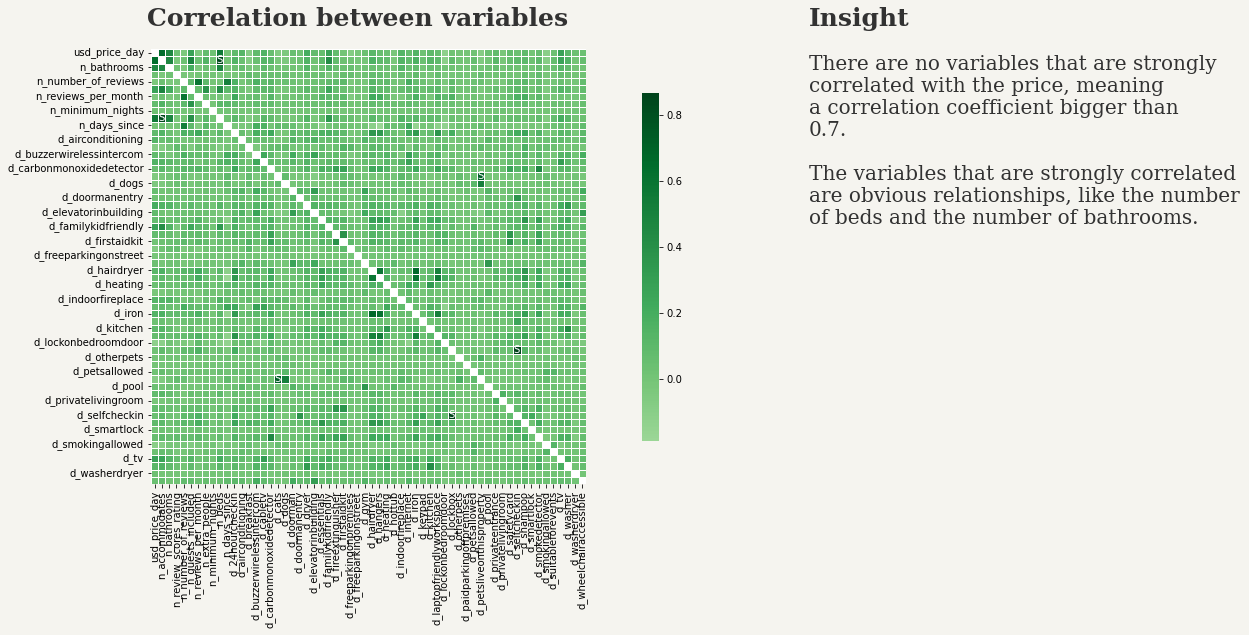

In [13]:
labels = np.where(np.abs(df_corr)>0.70, "S", "")

fig = plt.figure(figsize=(20, 8), facecolor= background_color)
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="Greens", cbar_kws={"shrink": 0.8});

fig.text(0.44,0.92,'Correlation between variables', fontfamily='serif',fontsize=25, fontweight='bold', color='#323232')
fig.text(0.9, 0.92, 'Insight', fontsize=25, fontweight='bold', fontfamily='serif', color='#323232')

fig.text(0.9, 0.5, '''
There are no variables that are strongly
correlated with the price, meaning
a correlation coefficient bigger than
0.7.

The variables that are strongly correlated 
are obvious relationships, like the number
of beds and the number of bathrooms.

'''
         , fontsize=20, fontweight='light', fontfamily='serif', color='#323232')


plt.show()

<a id="2.4"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">The neighborhoods with the highest prices</h3>

In [14]:
sum_price_by_neighborhood = data.groupby('f_neighbourhood_cleansed')['usd_price_day'].sum().round().reset_index()

sum_price_by_neighborhood.rename(columns={'f_neighbourhood_cleansed': 'Neighborhood', 'usd_price_day': 'Total_Price'}, inplace=True)

sum_df = sum_price_by_neighborhood.sort_values(by='Total_Price')

In [16]:
import geopandas as gpd

# Replace 'path/to/london_neighborhoods.geojson' with the actual path to your GeoJSON file
geojson_path = 'C:/Users/moude/Desktop/Projetcs-data science/GitHub/AirBnb-Predicting rental prices/london_boroughs.json'

# Load the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(geojson_path)

gdf.rename(columns={'name': 'Neighborhood'}, inplace=True)

In [17]:
geo_df = sum_df.merge(gdf, on = 'Neighborhood', how = 'left')
geo_df = geo_df.loc[:, ['Neighborhood', 'Total_Price', 'geometry']]

In [18]:
from shapely.wkt import loads

geo_df['geometry'] = geo_df['geometry'].apply(lambda x: loads(x) if isinstance(x, str) else x)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(geo_df, geometry='geometry', crs='EPSG:4326')

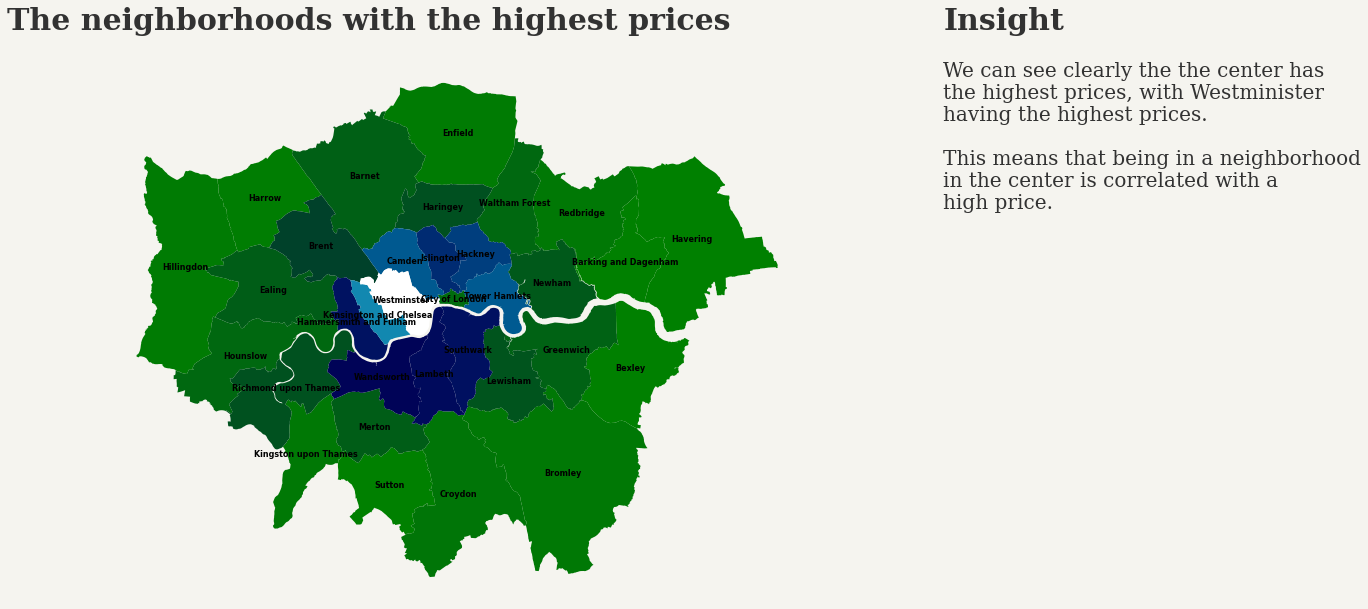

In [20]:
fig, ax = plt.subplots(figsize = (20,10), facecolor= '#F5F4EF')
gdf.plot(ax=ax, column = 'Total_Price', cmap = "ocean")

for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Neighborhood']):
    ax.text(x, y, label,fontsize=8, ha='center', va='center', fontweight='bold', color='black')

ax.axis('off')
fig.text(0.2, 0.92,"The neighborhoods with the highest prices ", fontsize= 30,fontweight='bold',fontfamily='serif',color='#323232')
fig.text(0.85, 0.92, 'Insight', fontsize=30, fontweight='bold', fontfamily='serif',color='#323232')

fig.text(0.85, 0.58, '''
We can see clearly the the center has
the highest prices, with Westminister
having the highest prices.

This means that being in a neighborhood
in the center is correlated with a 
high price.


'''
         , fontsize=20, fontweight='light', fontfamily='serif',color='#323232')

plt.show()

<a id="2.5"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">The average price by neighborhood</h3>

In [21]:
average_price_by_neighborhood = data.groupby('f_neighbourhood_cleansed')['usd_price_day'].mean().round().reset_index()

average_price_by_neighborhood.rename(columns={'f_neighbourhood_cleansed': 'Neighborhood', 'usd_price_day': 'Average_Price'}, inplace=True)

avg_df = average_price_by_neighborhood.sort_values(by='Average_Price')

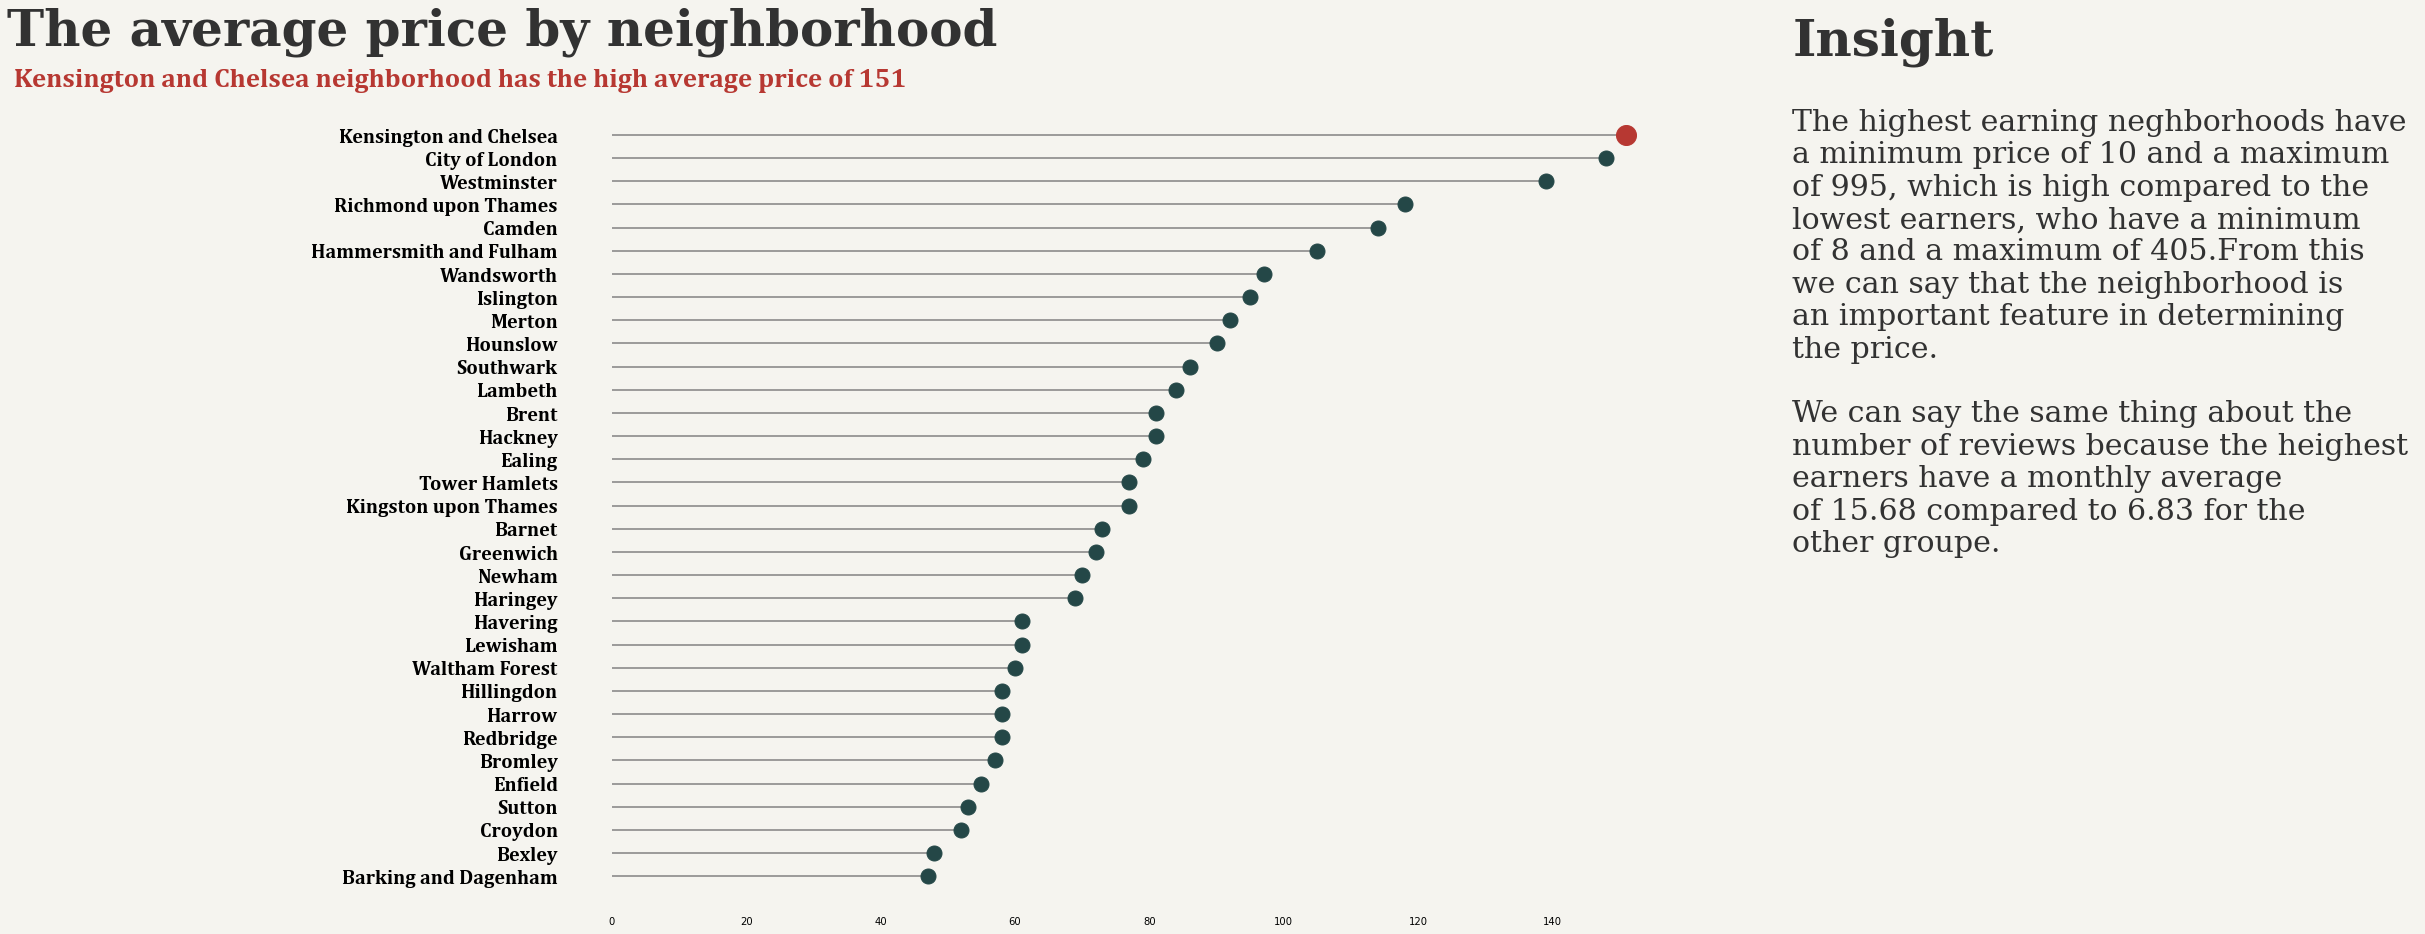

In [22]:
fig, ax = plt.subplots(figsize=(20, 15), facecolor= '#F5F4EF')

temp = avg_df
my_range=range(1,len(avg_df['Neighborhood'])+1)

background_color = '#F5F4EF'
ax.set_facecolor(background_color)

plt.hlines(y=my_range, xmin=0, xmax=temp['Average_Price'], color='gray')
plt.plot(temp['Average_Price'], my_range, "o",markersize=15, color='#244747')
plt.plot(temp['Average_Price'][19], my_range[32], "o",markersize=20,color='#B73832')


Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Average price",fontfamily='monospace',loc='left',color='black')
ax.set_axisbelow(True)

for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    

ax.text(-90,Yend+2.3, 'The average price by neighborhood', fontsize=50,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(-89,Yend+0.5, 'Kensington and Chelsea neighborhood has the high average price of 151', fontsize=27,fontweight='bold',fontfamily='cambria',color='#B73832')
fig.text(0.98, 0.92, 'Insight', fontsize=50, fontweight='bold', fontfamily='serif',color='#323232')
fig.text(0.98, 0.37, '''
The highest earning neghborhoods have 
a minimum price of 10 and a maximum 
of 995, which is high compared to the
lowest earners, who have a minimum 
of 8 and a maximum of 405.From this 
we can say that the neighborhood is
an important feature in determining 
the price.

We can say the same thing about the 
number of reviews because the heighest 
earners have a monthly average 
of 15.68 compared to 6.83 for the
other groupe.


'''
         , fontsize=30, fontweight='light', fontfamily='serif',color='#323232')


plt.yticks(my_range, temp['Neighborhood'], fontsize=20,fontweight='bold',fontfamily='cambria')
plt.xlabel('')
plt.show()

<a id="2.6"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">Comparison between the top and the last neighborhoods in termes of price</h3>

In [23]:
subset_df1 = data[data['f_neighbourhood_cleansed'] == 'Barking and Dagenham']
subset_df2 = data[data['f_neighbourhood_cleansed'] == 'Bexley']
subset_df3 = data[data['f_neighbourhood_cleansed'] == 'Croydon']

In [24]:
merged_df1 = pd.concat([subset_df1, subset_df2, subset_df3])

In [25]:
subset_df4 = data[data['f_neighbourhood_cleansed'] == 'Kensington and Chelsea']
subset_df5 = data[data['f_neighbourhood_cleansed'] == 'City of London']
subset_df6 = data[data['f_neighbourhood_cleansed'] == 'Westminster']

In [26]:
merged_df2 = pd.concat([subset_df4, subset_df5, subset_df6])

In [27]:
merged_df1.describe()

usd_price_day  n_accommodates  n_bathrooms  n_review_scores_rating  \
count     760.000000      760.000000   760.000000              760.000000   
mean       50.402632        2.519737     1.217105               93.465789   
std        39.271743        1.637708     0.561944                7.222523   
min         8.000000        1.000000     0.000000               20.000000   
25%        27.000000        2.000000     1.000000               94.000000   
50%        39.000000        2.000000     1.000000               94.000000   
75%        60.000000        3.000000     1.000000               98.000000   
max       405.000000       16.000000     8.000000              100.000000   

       n_number_of_reviews  n_guests_included  n_reviews_per_month  \
count           760.000000         760.000000           760.000000   
mean              6.836842           1.318421             0.894145   
std              15.940261           1.018241             0.883176   
min               0.000000           1.000000             0.030000   
25%               0.000000           1.000000             0.480000   
50%               1.000000           1.000000             0.770000   
75%               6.000000           1.000000             0.805000   
max             182.000000          12.000000             8.330000   

       n_extra_people  n_minimum_nights      n_beds  ...  d_selfcheckin  \
count      760.000000        760.000000  760.000000  ...     760.000000   
mean         6.381579          2.597368    1.578947  ...       0.022368   
std         10.992113          5.249355    1.077536  ...       0.147976   
min          0.000000          1.000000    1.000000  ...       0.000000   
25%          0.000000          1.000000    1.000000  ...       0.000000   
50%          0.000000          1.000000    1.000000  ...       0.000000   
75%         10.000000          3.000000    2.000000  ...       0.000000   
max        100.000000         90.000000    8.000000  ...       1.000000   

        d_shampoo  d_smartlock  d_smokedetector  d_smokingallowed  \
count  760.000000   760.000000       760.000000        760.000000   
mean     0.494737     0.001316         0.781579          0.097368   
std      0.500302     0.036274         0.413447          0.296654   
min      0.000000     0.000000         0.000000          0.000000   
25%      0.000000     0.000000         1.000000          0.000000   
50%      0.000000     0.000000         1.000000          0.000000   
75%      1.000000     0.000000         1.000000          0.000000   
max      1.000000     1.000000         1.000000          1.000000   

       d_suitableforevents        d_tv    d_washer  d_washerdryer  \
count           760.000000  760.000000  760.000000     760.000000   
mean              0.032895    0.672368    0.782895       0.001316   
std               0.178479    0.469659    0.412546       0.036274   
min               0.000000    0.000000    0.000000       0.000000   
25%               0.000000    0.000000    1.000000       0.000000   
50%               0.000000    1.000000    1.000000       0.000000   
75%               0.000000    1.000000    1.000000       0.000000   
max               1.000000    1.000000    1.000000       1.000000   

       d_wheelchairaccessible  
count              760.000000  
mean                 0.064474  
std                  0.245757  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                  1.000000  

[8 rows x 60 columns]

In [28]:
merged_df2.describe()

usd_price_day  n_accommodates  n_bathrooms  n_review_scores_rating  \
count    8881.000000     8881.000000  8881.000000             8881.000000   
mean      143.952595        3.430920     1.296082               91.416732   
std       106.616738        1.879233     0.563002                9.106679   
min        10.000000        1.000000     0.000000               20.000000   
25%        79.000000        2.000000     1.000000               90.000000   
50%       119.000000        3.000000     1.000000               94.000000   
75%       175.000000        4.000000     1.500000               96.000000   
max       995.000000       16.000000     8.000000              100.000000   

       n_number_of_reviews  n_guests_included  n_reviews_per_month  \
count          8881.000000        8881.000000          8881.000000   
mean             15.682693           1.516834             1.422247   
std              29.186774           1.092549             1.462603   
min               0.000000           1.000000             0.020000   
25%               0.000000           1.000000             0.600000   
50%               4.000000           1.000000             0.770000   
75%              18.000000           2.000000             1.850000   
max             396.000000          12.000000            15.000000   

       n_extra_people  n_minimum_nights       n_beds  ...  d_selfcheckin  \
count     8881.000000       8881.000000  8881.000000  ...    8881.000000   
mean         8.044364          3.641031     1.843486  ...       0.049431   
std         14.674941          9.423289     1.144830  ...       0.216779   
min          0.000000          1.000000     1.000000  ...       0.000000   
25%          0.000000          1.000000     1.000000  ...       0.000000   
50%          0.000000          2.000000     2.000000  ...       0.000000   
75%         15.000000          3.000000     2.000000  ...       0.000000   
max        230.000000        300.000000    16.000000  ...       1.000000   

         d_shampoo  d_smartlock  d_smokedetector  d_smokingallowed  \
count  8881.000000  8881.000000      8881.000000       8881.000000   
mean      0.658935     0.002139         0.786398          0.049994   
std       0.474094     0.046207         0.409872          0.217946   
min       0.000000     0.000000         0.000000          0.000000   
25%       0.000000     0.000000         1.000000          0.000000   
50%       1.000000     0.000000         1.000000          0.000000   
75%       1.000000     0.000000         1.000000          0.000000   
max       1.000000     1.000000         1.000000          1.000000   

       d_suitableforevents         d_tv     d_washer  d_washerdryer  \
count          8881.000000  8881.000000  8881.000000    8881.000000   
mean              0.023421     0.770296     0.872762       0.000113   
std               0.151244     0.420666     0.333258       0.010611   
min               0.000000     0.000000     0.000000       0.000000   
25%               0.000000     1.000000     1.000000       0.000000   
50%               0.000000     1.000000     1.000000       0.000000   
75%               0.000000     1.000000     1.000000       0.000000   
max               1.000000     1.000000     1.000000       1.000000   

       d_wheelchairaccessible  
count             8881.000000  
mean                 0.049882  
std                  0.217713  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                  1.000000  

[8 rows x 60 columns]

The highest earning neghborhoods have a minimum price of 10 and a maximum of 995, which is high compared to the lowest earners, who have a minimum of 8 and a maximum of 405.From this we can say that the neighborhood is an important feature in determining the price.

We can say the same thing about the number of reviews because the heighest earners have a monthly average of 15.68 compared to 6.83 for the other groupe.

<a id="2.7"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">Neighborhoods by number of listings</h3>

In [29]:
x=data.groupby(['f_neighbourhood_cleansed'])['f_neighbourhood_cleansed'].count().sort_values(ascending=False)

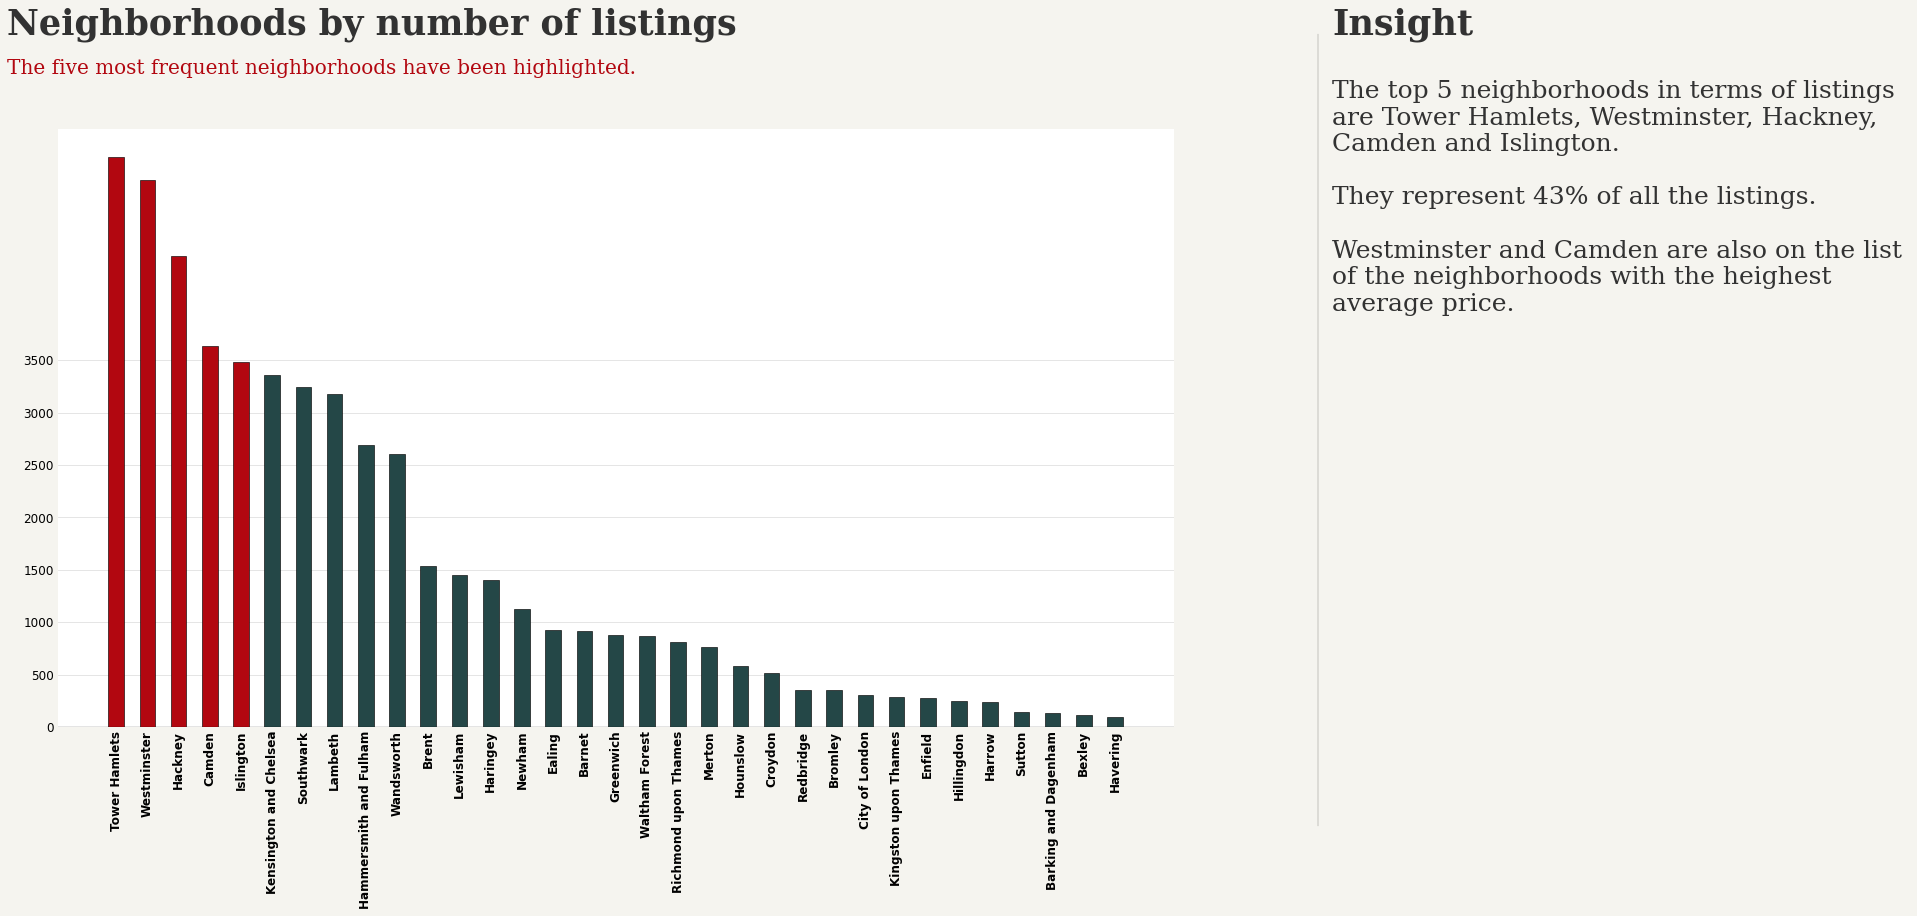

In [30]:
color_map = ['#244747' for _ in range(33)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] = color_map[4] = '#b20710' 

fig, ax = plt.subplots(1,1, figsize=(20, 11), facecolor = background_color)

ax.bar(x.index, x, width=0.5, 
       edgecolor='black',
       linewidth=0.6,color = color_map)
plt.xticks(rotation='vertical', fontweight = 'bold')


# Title and sub-title

fig.text(0.09, 1, 'Neighborhoods by number of listings', fontsize=35, fontweight='bold', fontfamily='serif',color='#323232')
fig.text(0.09, 0.95, 'The five most frequent neighborhoods have been highlighted.', fontsize=20, fontweight='light', fontfamily='serif', color = '#b20710')

fig.text(1.01, 1, 'Insight', fontsize=35, fontweight='bold', fontfamily='serif',color='#323232')

fig.text(1.01, 0.55, '''
The top 5 neighborhoods in terms of listings 
are Tower Hamlets, Westminster, Hackney, 
Camden and Islington. 

They represent 43% of all the listings.

Westminster and Camden are also on the list 
of the neighborhoods with the heighest 
average price.
 

'''
         , fontsize=25, fontweight='light', fontfamily='serif',color='#323232')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)

for s in ['top','left', 'bottom', 'right']:
    ax.spines[s].set_visible(False)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

<a id="2.8"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">Comapring price to property type</h3>

In [31]:
Apartement_avg = data.query("f_property_type == 'Apartment'")['usd_price_day'].mean()
House_avg = data.query("f_property_type == 'House'")['usd_price_day'].mean()

In [32]:
s1 = data[(data['f_property_type'] == 'Apartment') & (data['usd_price_day'] > 95)]

s1['usd_price_day'].mean()

158.22129565816678

In [33]:
s2 = data[(data['f_property_type'] == 'House') & (data['usd_price_day'] > 95)]

s2['usd_price_day'].mean()

215.45087900723888

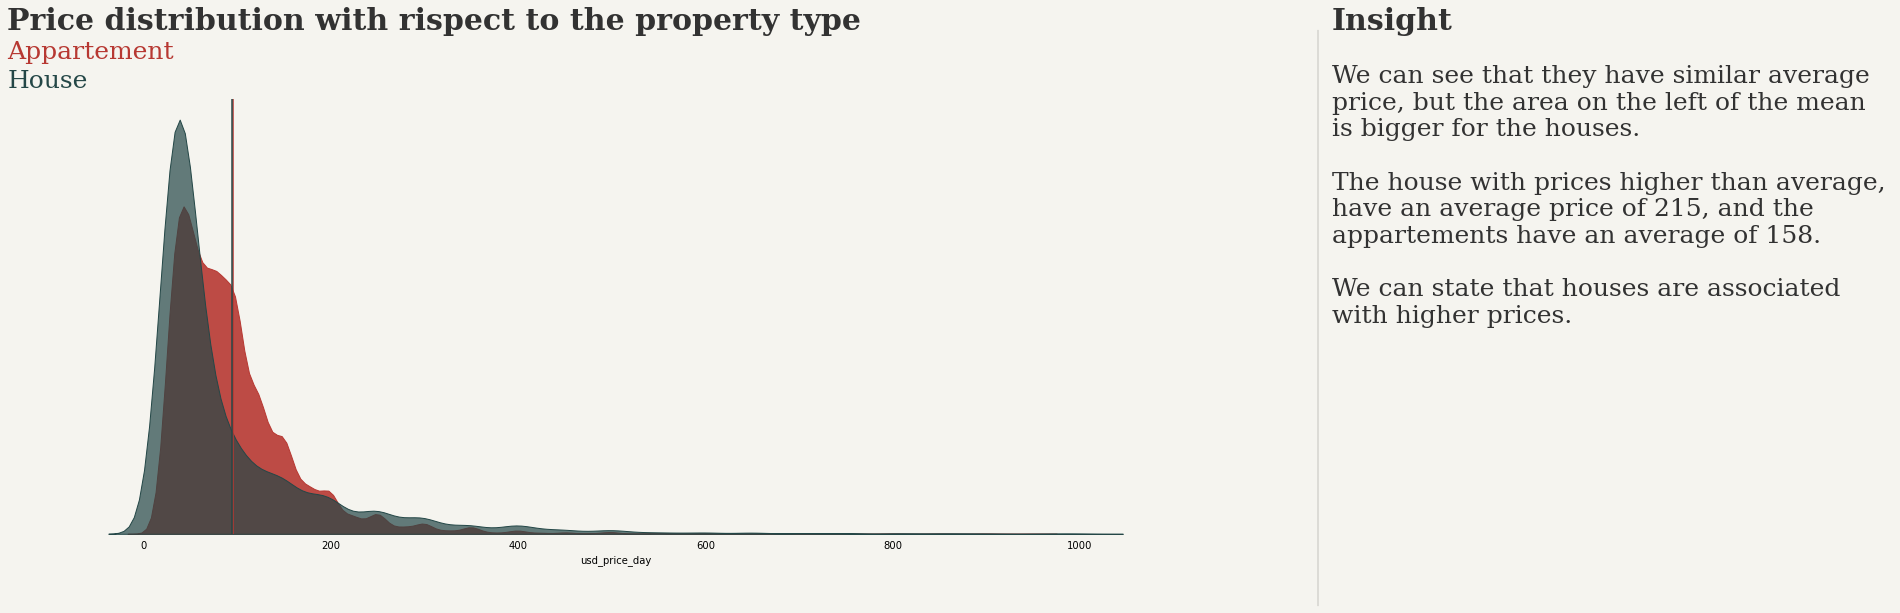

In [34]:
fig, ax = plt.subplots(1,1, figsize=(20,8), facecolor=background_color)
ax.set_facecolor(background_color)

sns.kdeplot(data=data.query("f_property_type == 'Apartment'"), x='usd_price_day',shade=True,color='#B73832',alpha=0.9, ax=ax)
sns.kdeplot(data=data.query("f_property_type == 'House'"), x='usd_price_day', shade=True, color='#244747',alpha=0.7, ax=ax)

ax.axvline(color='#B73832',x=Apartement_avg)
ax.axvline(color='#244747',x=House_avg)

for s in ['top','left', 'bottom', 'right']:
    ax.spines[s].set_visible(False)
    
ax.get_yaxis().set_visible(False)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 


Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

fig.text(0.09, 1, 'Price distribution with rispect to the property type', fontsize=30, fontweight='bold', fontfamily='serif',color='#323232')
fig.text(0.09, 0.95, 'Appartement', fontsize=25, fontweight='light',color='#B73832', fontfamily='serif')
fig.text(0.09, 0.9, 'House', fontsize=25, color='#244747', fontweight='light', fontfamily='serif')

fig.text(1.01, 1, 'Insight', fontsize=30, fontweight='bold', fontfamily='serif',color='#323232')
fig.text(1.01, 0.4, '''We can see that they have similar average 
price, but the area on the left of the mean 
is bigger for the houses.

The house with prices higher than average, 
have an average price of 215, and the 
appartements have an average of 158.

We can state that houses are associated 
with higher prices.

'''
         , fontsize=25, fontweight='light', fontfamily='serif',color='#323232')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])


plt.show()

<a id="2.9"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">Comapring price to room type</h3>

In [35]:
data['f_room_type'].value_counts()

Entire home/apt    26698
Private room       24408
Shared room          540
Name: f_room_type, dtype: int64

In [36]:
pr_avg = data.query("f_room_type == 'Private room'")['usd_price_day'].mean()
eh_avg = data.query("f_room_type == 'Entire home/apt'")['usd_price_day'].mean()
sr_avg = data.query("f_room_type == 'Shared room'")['usd_price_day'].mean()

print('Average price for Private room is    :', round(pr_avg, 2))
print('Average price for Entire home/apt is :',round(eh_avg, 2))
print('Average price for Shared room is     :',round(sr_avg, 2))

Average price for Private room is    : 49.79
Average price for Entire home/apt is : 137.25
Average price for Shared room is     : 38.84


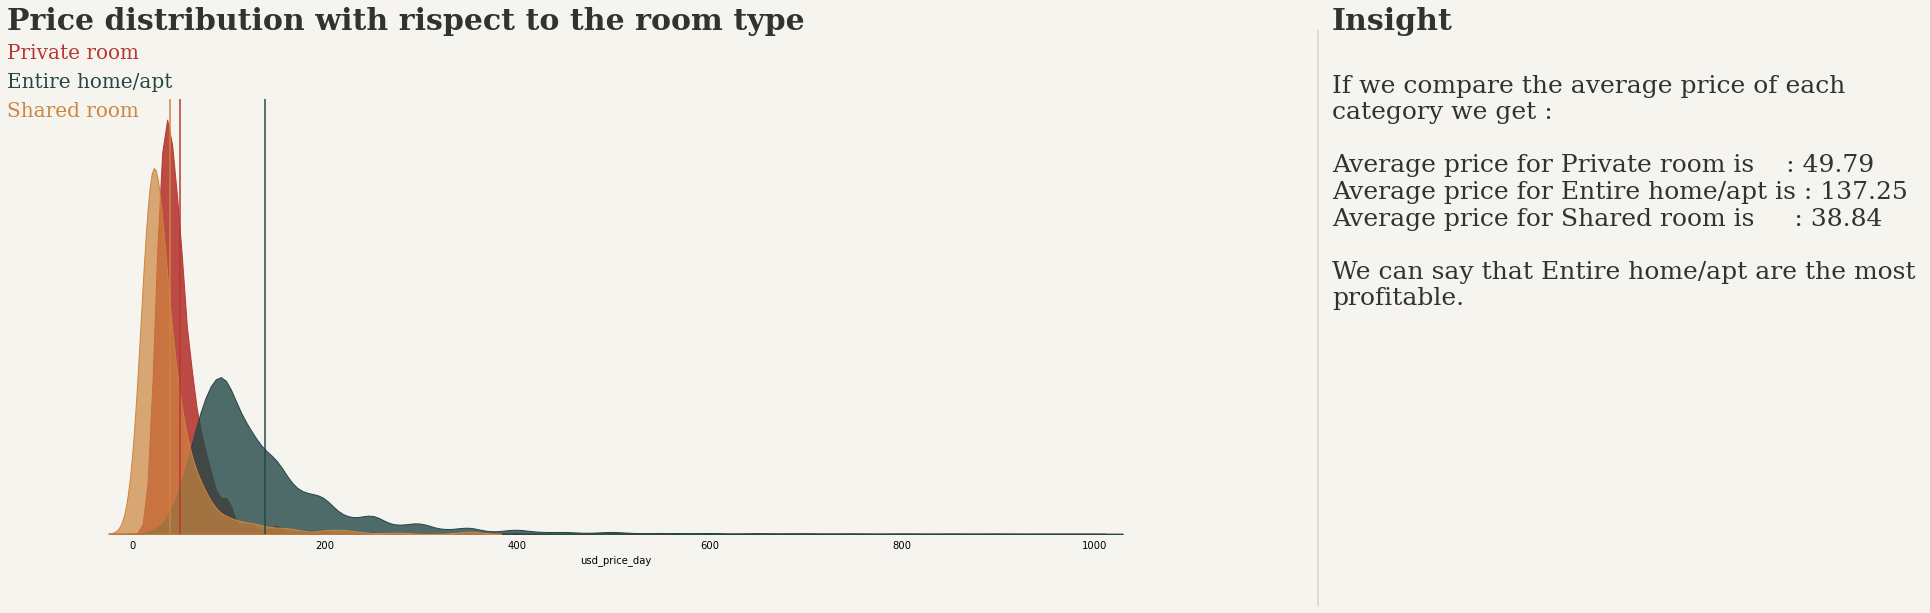

In [37]:
fig, ax = plt.subplots(1,1, figsize=(20,8), facecolor=background_color)
ax.set_facecolor(background_color)

sns.kdeplot(data=data.query("f_room_type == 'Private room'"), x='usd_price_day',shade=True,color='#B73832',alpha=0.9, ax=ax)
sns.kdeplot(data=data.query("f_room_type == 'Entire home/apt'"), x='usd_price_day', shade=True, color='#244747',alpha=0.8, ax=ax)
sns.kdeplot(data=data.query("f_room_type == 'Shared room'"), x='usd_price_day', shade=True, color='peru',alpha=0.7, ax=ax)

ax.axvline(color='#B73832',x=pr_avg)
ax.axvline(color='#244747',x=eh_avg)
ax.axvline(color='peru',x=sr_avg)

for s in ['top','left', 'bottom', 'right']:
    ax.spines[s].set_visible(False)
    
ax.get_yaxis().set_visible(False)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 



fig.text(0.09, 1, 'Price distribution with rispect to the room type', fontsize=30, fontweight='bold', fontfamily='serif',color='#323232')
fig.text(0.09, 0.95, 'Private room', fontsize=20, fontweight='light',color='#B73832', fontfamily='serif')
fig.text(0.09, 0.9, 'Entire home/apt', fontsize=20, color='#244747', fontweight='light', fontfamily='serif')
fig.text(0.09, 0.85, 'Shared room', fontsize=20, color='peru', fontweight='light', fontfamily='serif')

fig.text(1.01, 1, 'Insight', fontsize=30, fontweight='bold', fontfamily='serif',color='#323232')
fig.text(1.01, 0.43, '''If we compare the average price of each
category we get :

Average price for Private room is    : 49.79
Average price for Entire home/apt is : 137.25
Average price for Shared room is     : 38.84

We can say that Entire home/apt are the most 
profitable.

'''
         , fontsize=25, fontweight='light', fontfamily='serif',color='#323232')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])


plt.show()

<a id="2.10"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">Plotting price with respect to reviews </h3>

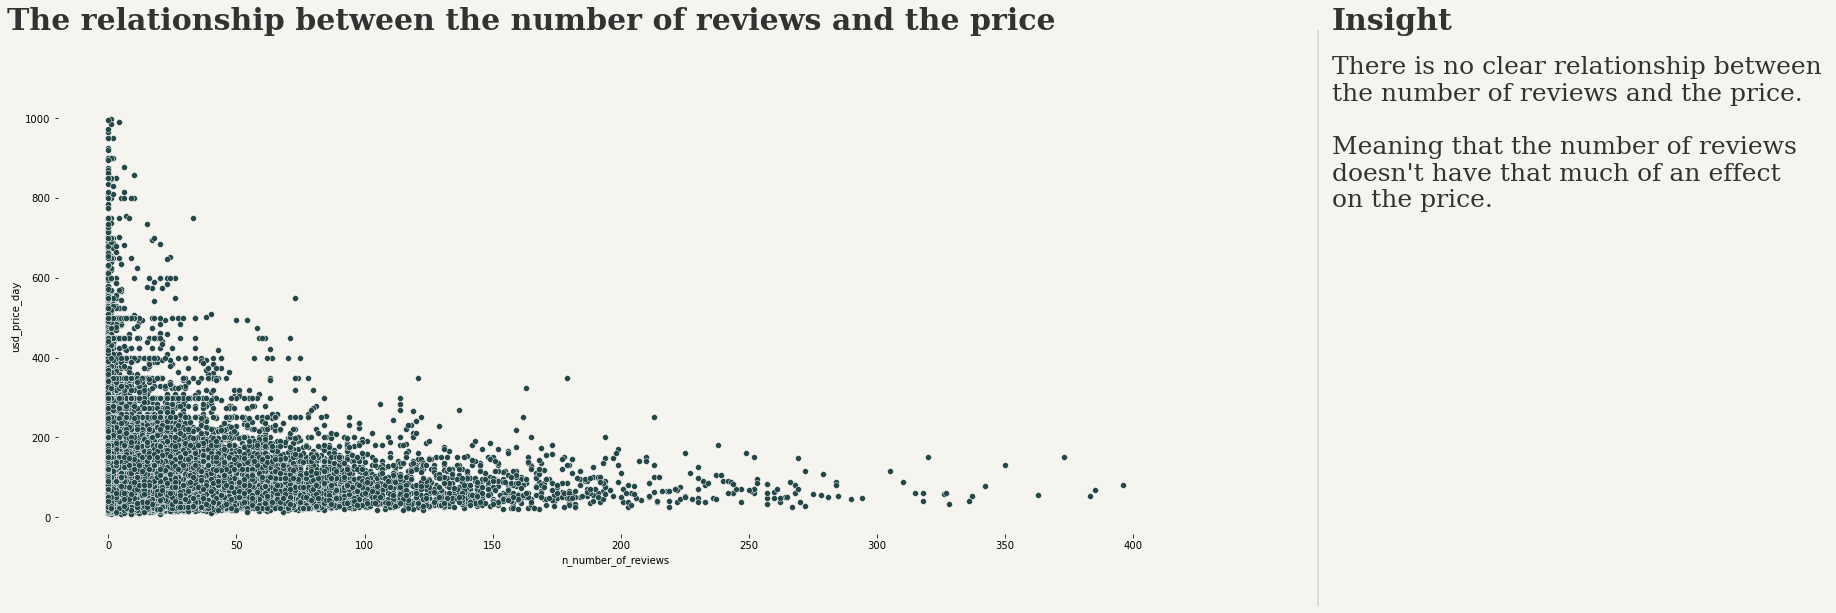

In [38]:
fig, ax = plt.subplots(1,1, figsize=(20,8), facecolor=background_color)
ax.set_facecolor(background_color)

sns.scatterplot(data=data,x='n_number_of_reviews',y='usd_price_day',ax=ax,color='#244747')

for s in ['top','left', 'bottom', 'right']:
    ax.spines[s].set_visible(False)
    

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

fig.text(0.09, 1, 'The relationship between the number of reviews and the price', fontsize=30, fontweight='bold', fontfamily='serif',color='#323232')
fig.text(1.01, 1, 'Insight', fontsize=30, fontweight='bold', fontfamily='serif',color='#323232')
fig.text(1.01, 0.6, '''There is no clear relationship between 
the number of reviews and the price.

Meaning that the number of reviews 
doesn't have that much of an effect 
on the price.

'''
         , fontsize=25, fontweight='light', fontfamily='serif',color='#323232')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])


plt.show()

<a id="3"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:250%;text-align:center;border-radius: 15px 50px;">Modeling</h3>

In [5]:
import time
import itertools
import statsmodels.api as sm 
from deap import creator, base, tools, algorithms
import random
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [6]:
# Factorizing the category column
data['f_neighbourhood_cleansed'], unique_categories = pd.factorize(data['f_neighbourhood_cleansed'])
data['f_room_type'], unique_categories = pd.factorize(data['f_room_type'])
data['f_cancellation_policy'], unique_categories = pd.factorize(data['f_cancellation_policy'])
data['f_bed_type'], unique_categories = pd.factorize(data['f_bed_type'])
data['f_property_type'], unique_categories = pd.factorize(data['f_property_type'])

In [38]:
data_n = data.apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [7]:
y = data['usd_price_day']
X = data.drop('usd_price_day', axis=1)
X = sm.add_constant(X) 

<a id="3.1"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">Best subset selection</h3>

In [332]:
def processSubset(feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    predictions = regr.predict(X[list(feature_set)])
    squared_errors = (predictions - y) ** 2
    mse = squared_errors.mean()

    return {"model": regr, "MSE": mse}



def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))

    models = pd.DataFrame(results)

    best_model = models.loc[models['MSE'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    return best_model

In [335]:
import time
import itertools

models_best = pd.DataFrame(columns=["MSE", "model"])

tic = time.time()
for i in range(1,3):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

print(models_best)

Processed 65 models on 1 predictors in 0.35139918327331543 seconds.
Processed 2080 models on 2 predictors in 25.64061164855957 seconds.
Total elapsed time: 26.921387195587158 seconds.
           MSE                                              model
1  3817.969883  <statsmodels.regression.linear_model.Regressio...
2  3601.971828  <statsmodels.regression.linear_model.Regressio...


<a id="3.2"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">Forward stepwise regression</h3>

In [35]:
import time
import statsmodels.api as sm

def processSubset(feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    predictions = regr.predict(X[list(feature_set)])
    mse = ((predictions - y) ** 2).mean() 
    return {"model": regr, "MSE": mse}

def forward(predictors):
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    models = pd.DataFrame(results)

    best_model = models.loc[models['MSE'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")

    return best_model


models_fwd = pd.DataFrame(columns=["MSE", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  65 models on 1 predictors in 0.5597097873687744 seconds.
Processed  64 models on 2 predictors in 0.8441023826599121 seconds.
Processed  63 models on 3 predictors in 1.100386381149292 seconds.
Processed  62 models on 4 predictors in 1.2127649784088135 seconds.
Processed  61 models on 5 predictors in 1.050142765045166 seconds.
Processed  60 models on 6 predictors in 1.1800227165222168 seconds.
Processed  59 models on 7 predictors in 1.3360943794250488 seconds.
Processed  58 models on 8 predictors in 1.4468533992767334 seconds.
Processed  57 models on 9 predictors in 1.6721444129943848 seconds.
Processed  56 models on 10 predictors in 1.9599871635437012 seconds.
Processed  55 models on 11 predictors in 2.0497725009918213 seconds.
Processed  54 models on 12 predictors in 2.0591135025024414 seconds.
Processed  53 models on 13 predictors in 2.3361339569091797 seconds.
Processed  52 models on 14 predictors in 2.5417895317077637 seconds.
Processed  51 models on 15 predictors in 3.04

In [48]:
print(models_fwd.loc[65, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:          usd_price_day   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     949.1
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:10:02   Log-Likelihood:            -2.8010e+05
No. Observations:               51646   AIC:                         5.603e+05
Df Residuals:                   51581   BIC:                         5.609e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
n_accommodates        

In [46]:
models_fwd.sort_values(by='MSE')

MSE                                              model
65  3007.539903  <statsmodels.regression.linear_model.Regressio...
64  3007.541394  <statsmodels.regression.linear_model.Regressio...
63  3007.545708  <statsmodels.regression.linear_model.Regressio...
62  3007.671671  <statsmodels.regression.linear_model.Regressio...
61  3007.681893  <statsmodels.regression.linear_model.Regressio...
..          ...                                                ...
5   3255.513322  <statsmodels.regression.linear_model.Regressio...
4   3299.529739  <statsmodels.regression.linear_model.Regressio...
3   3388.321437  <statsmodels.regression.linear_model.Regressio...
2   3601.971828  <statsmodels.regression.linear_model.Regressio...
1   3817.969883  <statsmodels.regression.linear_model.Regressio...

[65 rows x 2 columns]

65 variables, mse 3007.53.

<a id="3.3"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">Backward stepwise regression</h3>

In [49]:
import itertools


def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))

    models = pd.DataFrame(results)

    best_model = models.loc[models['MSE'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")

    return best_model

In [50]:
import itertools

models_bwd = pd.DataFrame(columns=["MSE", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")


print(models_bwd.loc[5, "model"].summary())

Processed  65 models on 64 predictors in 32.30963635444641 seconds.
Processed  64 models on 63 predictors in 32.943652868270874 seconds.
Processed  63 models on 62 predictors in 29.250470399856567 seconds.
Processed  62 models on 61 predictors in 25.086739778518677 seconds.
Processed  61 models on 60 predictors in 24.22084403038025 seconds.
Processed  60 models on 59 predictors in 21.619860887527466 seconds.
Processed  59 models on 58 predictors in 20.219507932662964 seconds.
Processed  58 models on 57 predictors in 19.13488507270813 seconds.
Processed  57 models on 56 predictors in 18.474745512008667 seconds.
Processed  56 models on 55 predictors in 17.500530242919922 seconds.
Processed  55 models on 54 predictors in 16.6588397026062 seconds.
Processed  54 models on 53 predictors in 15.819956302642822 seconds.
Processed  53 models on 52 predictors in 15.245315790176392 seconds.
Processed  52 models on 51 predictors in 14.778459310531616 seconds.
Processed  51 models on 50 predictors i

In [51]:
models_bwd

MSE                                              model
1   3817.969883  <statsmodels.regression.linear_model.Regressio...
2   3601.971828  <statsmodels.regression.linear_model.Regressio...
3   3388.321437  <statsmodels.regression.linear_model.Regressio...
4   3299.529739  <statsmodels.regression.linear_model.Regressio...
5   3255.513322  <statsmodels.regression.linear_model.Regressio...
..          ...                                                ...
60  3007.606771  <statsmodels.regression.linear_model.Regressio...
61  3007.567267  <statsmodels.regression.linear_model.Regressio...
62  3007.547192  <statsmodels.regression.linear_model.Regressio...
63  3007.542823  <statsmodels.regression.linear_model.Regressio...
64  3007.541326  <statsmodels.regression.linear_model.Regressio...

[64 rows x 2 columns]

64 variables, mse 3007.54.

<a id="3.4"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">Genetic algorithm</h3>

In [11]:
import statsmodels.api as sm 
from deap import creator, base, tools, algorithms
import random
from sklearn.metrics import mean_squared_error

In [12]:
y = data['usd_price_day']
X = data.drop('usd_price_day', axis=1)
X = sm.add_constant(X) 

In [13]:
def getFitness(individual, X, y):
    cols = [index for index in range(
        len(individual)) if individual[index] == 0]
    X_parsed = X.drop(X.columns[cols], axis=1)

    model = sm.OLS(y,X_parsed)
    regr = model.fit()
    
    y_pred = regr.predict(X_parsed)
    mse = mean_squared_error(y, y_pred)

    return (-mse,)


        
def geneticAlgorithm(X, y, n_population, n_generation):
    """
    Deap global variables
    Initialize variables to use eaSimple
    """

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat,
                     creator.Individual, toolbox.attr_bool, len(X.columns))
    toolbox.register("population", tools.initRepeat, list,
                     toolbox.individual)
    toolbox.register("evaluate", getFitness, X=X, y=y)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=n_population)
    hof = tools.HallOfFame(n_population * n_generation)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.1,
                                   ngen=n_generation, stats=stats, halloffame=hof,
                                   verbose=True)

    return hof, log

def bestIndividual(hof, X, y):
    """
    Get the best individual
    """
    bestMSE = float('inf') 
    bestIndividual = None
    bestIndividualHeader = None

    for individual in hof:
        currentMSE = -individual.fitness.values[0]  
        if currentMSE < bestMSE:
            bestMSE = currentMSE
            bestIndividual = individual

    bestIndividualHeader = [list(X)[i] for i in range(len(bestIndividual)) if bestIndividual[i] == 1]
    
    return bestMSE, bestIndividual, bestIndividualHeader

In [14]:
individual0 = [1 for i in range(len(X.columns))]
np.sum(individual0)
print("all features: \t" + 
      str(getFitness(individual0, X, y)) + "\n")

all features: 	(-3007.539902992072,)



In [16]:
n_pop = 150
n_gen = 50

hof, log = geneticAlgorithm(X, y, n_pop, n_gen)


accuracy, individual, header = bestIndividual(hof, X, y)
print('Best Adjusted R_square: \t' + str(accuracy))
print('Number of Features in Subset: \t' + str(individual.count(1)))
print('Individual: \t\t' + str(individual))
print('Feature Subset\t: ' + str(header))

print('\n\ncreating a new model with the result')

gen	nevals	avg     	min     	max     
0  	150   	-3662.53	-5709.37	-3091.52
1  	137   	-3322.7 	-4467.47	-3075.3 
2  	130   	-3194.22	-4516.72	-3047.87
3  	115   	-3123   	-3391.34	-3054.24
4  	113   	-3115.97	-4661.02	-3063.04
5  	120   	-3100.54	-3711.91	-3047.6 
6  	123   	-3090.38	-4253.99	-3039.93
7  	126   	-3076.06	-4257.33	-3035.23
8  	125   	-3073.4 	-4304.81	-3034.14
9  	130   	-3057.93	-3606.84	-3031.75
10 	127   	-3046.36	-3307.34	-3024.28
11 	117   	-3046.99	-3586.87	-3023.14
12 	125   	-3037.06	-3281.54	-3019.88
13 	131   	-3035.19	-3481.08	-3018.15
14 	128   	-3037.17	-3589.41	-3012.94
15 	127   	-3029.78	-3282.99	-3012.94
16 	127   	-3028.23	-3584.08	-3011.25
17 	126   	-3020.95	-3288.94	-3010.4 
18 	130   	-3027.68	-3530.71	-3010.34
19 	112   	-3022.26	-3280.02	-3010.34
20 	118   	-3026.44	-3289.79	-3010.23
21 	121   	-3014.91	-3261.73	-3009.86
22 	130   	-3022.13	-3339.24	-3009.86
23 	118   	-3026.83	-3312.15	-3008.91
24 	117   	-3015.96	-3257.72	-3008.87
25 	121   	-

58 variables, mse 3008.54.

In [25]:
X_new = X[header]
model = sm.OLS(y, X_new)
regr = model.fit()
regr.summary()

residuals = regr.resid

mse = (residuals ** 2).mean()

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3007.971848782258


<a id="3.5"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">Lasso Regression</h3>

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

Text(0, 0.5, 'weights')

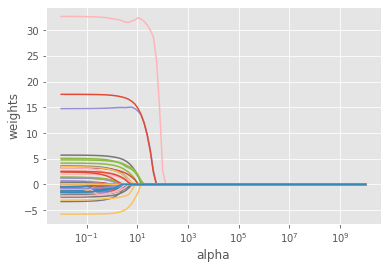

In [35]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 

lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [36]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

2763.7020825106715

In [37]:
lasso.coef_

array([ 0.00000000e+00, -5.03738781e-01,  2.82094092e+01,  4.08312233e+00,
       -4.21455245e+00,  5.50565962e-01,  1.74219744e+01,  3.30542045e+01,
        3.94353093e-01, -5.64597598e-02, -3.09880785e+00, -2.45689078e+00,
       -3.22123499e-02,  3.91140692e-02,  2.71037898e+00, -1.11289044e-03,
       -8.51989092e-01,  2.46451785e+01, -2.19451162e+00,  2.48492648e+00,
        5.95464528e+00, -2.84851574e+00, -3.91524507e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.01299475e+01,  4.53698179e+00,
       -1.02371469e+00, -8.73066366e-01,  2.41216446e+00, -6.94990357e-01,
       -1.34159226e+01, -0.00000000e+00,  0.00000000e+00, -1.77306448e+00,
       -2.12176936e+00, -5.96392282e+00, -0.00000000e+00,  1.05391935e+01,
       -2.79218237e+00,  4.89590653e+00,  0.00000000e+00, -4.11719503e+00,
       -2.70925396e+00, -5.48507854e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -2.99311803e-01, -3.73907672e+00,  6.80367081e-01,
        0.00000000e+00, -

49 variables, mse 2763.70

<a id="3.6"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">Ridge Regression</h3>

In [38]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [41]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

5.361336110051605

In [42]:
ridge3 = Ridge(alpha = ridgecv.alpha_)
ridge3.fit(X_train, y_train)
mean_squared_error(y_test, ridge3.predict(X_test))

2756.1456169870266

This represents a further improvement over the test MSE that we got using $\lambda=4$. Finally, we refit our ridge regression model on the full data set, using the value of $\lambda$ chosen by cross-validation, and examine the coefficient estimates.

In [44]:
ridge4 = Ridge(alpha = ridgecv.alpha_)
ridge4.fit(X, y)
pd.Series(ridge4.coef_)

0      0.000000
1     -0.752728
2     29.108873
3      3.743399
4     -8.204564
        ...    
60    -1.282097
61    10.263234
62    -5.894018
63    72.981668
64    -5.941437
Length: 65, dtype: float64

65 variables, mse 2756.14

<a id="2.7"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">Random forest</h3>

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

RF = RandomForestRegressor(n_estimators=300, max_features=25, oob_score=True, random_state=42)

RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set (Random Forest): {mse}')

Mean Squared Error on Test Set (Random Forest): 2073.6175890856757


<a id="3.8"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:200%;text-align:center;border-radius: 15px 50px;">Neural networks</h3>

In [12]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import ModelCheckpoint

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(65,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1) 
])

model.compile(optimizer='adam', loss='mean_squared_error')

checkpoint_callback = ModelCheckpoint(
    "best_model.h5",
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint_callback]
)

best_model = tf.keras.models.load_model("best_model.h5")

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set using the Best Model: {mse}')

Epoch 1/50
896/904 [============================>.] - ETA: 0s - loss: 3951.4739
Epoch 1: val_loss improved from inf to 2748.25659, saving model to best_model.h5
904/904 [==============================] - 3s 2ms/step - loss: 3946.9026 - val_loss: 2748.2566
Epoch 2/50
899/904 [============================>.] - ETA: 0s - loss: 2860.9243
Epoch 2: val_loss improved from 2748.25659 to 2651.05713, saving model to best_model.h5
904/904 [==============================] - 2s 2ms/step - loss: 2859.4722 - val_loss: 2651.0571
Epoch 3/50
904/904 [==============================] - ETA: 0s - loss: 2752.6453
Epoch 3: val_loss improved from 2651.05713 to 2639.47217, saving model to best_model.h5
904/904 [==============================] - 2s 2ms/step - loss: 2752.6453 - val_loss: 2639.4722
Epoch 4/50
888/904 [============================>.] - ETA: 0s - loss: 2708.9583
Epoch 4: val_loss improved from 2639.47217 to 2587.33276, saving model to best_model.h5
904/904 [==============================] - 2s 2ms/

Mean Squared Error on Test Set using the Best Model: 2394.55

<a id="2.7"></a>
<h3 style="background-color:#ADEFD1FF;font-family:serif;color:#00203FFF;font-size:250%;text-align:center;border-radius: 15px 50px;">Model Comparaison by MSE</h3>

In [13]:
mse_data = {
    'Model': ['Neural Networks', 'Random Forest', 'RidgeRegression', 'LassoRegressin', 'GA', 'Bwd selection', 'Fwd selectio,', 'Subset selection'],
    'MSE': [2394.55, 2073.61, 2756.14, 2763.70, 3007.94, 3007.54, 3007.53, 3601.97]
}


mse_df = pd.DataFrame(mse_data)


mse_df.set_index('Model', inplace=True)

mse_df = pd.DataFrame(mse_df.T)

mse_df

Model  Neural Networks  Random Forest  RidgeRegression  LassoRegressin  \
MSE            2394.55        2073.61          2756.14          2763.7   

Model       GA  Bwd selection  Fwd selectio,  Subset selection  
MSE    3007.94        3007.54        3007.53           3601.97

In [16]:
background_color = '#F5F4EF'
fig = plt.figure(figsize=(30,25), facecolor=background_color, dpi = 1000) 
gs = fig.add_gridspec(4, 1)
gs.update(wspace=0.1, hspace=0.5)
ax1 = fig.add_subplot(gs[0, :])

ax1.tick_params(axis=u'both', which=u'both',length=0)

sns.heatmap(mse_df, cmap='viridis',annot=True,fmt=".1%", linewidths=1,
            cbar=False,ax=ax1,annot_kws={"fontsize":14})

ax1.text(0,-0.2,'Models Comparison',fontsize=25,fontweight='bold',fontfamily='serif')
ax1.text(0,1.5,'• The RandForest model has the lowest MSE. After hyperparameter tunning with Gridsearch, we found (n_estimators=300, max_features=25) using OOB validation.',
         fontsize=20,fontfamily='serif')

ax1.text(0,1.7,'• The Neural network has one input layer, with two hidden layers with ReLU activation, and one output layer and an epochs of 50.',
         fontsize=20,fontfamily='serif')

plt.xticks(range(mse_df.shape[1]), mse_df.columns, ha='left', fontsize = 15)

plt.show()